In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Exam_Score_Prediction.csv')

In [3]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
df.shape

(20000, 13)

In [5]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [7]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: >

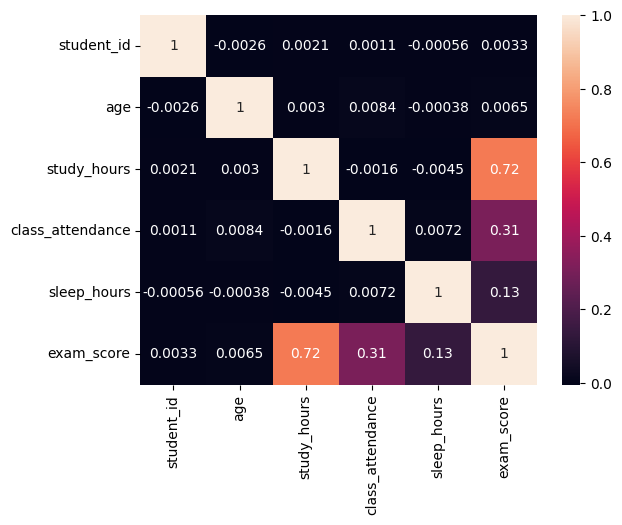

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [15]:
df['age'].unique()

array([17, 23, 22, 20, 18, 21, 24, 19])

In [16]:
df['student_id'].unique()

array([    1,     2,     3, ..., 19999, 20000, 20001])

In [17]:
df['exam_score'].value_counts()

,count
exam_score,
100.000,493
19.599,200
61.300,54
69.400,54
57.600,52
...,...
22.800,2
20.100,2
20.500,2


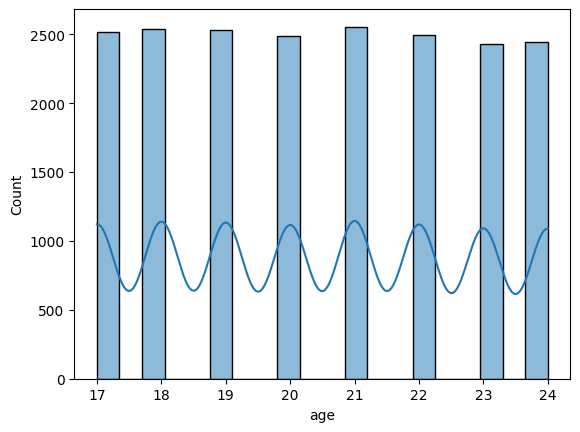

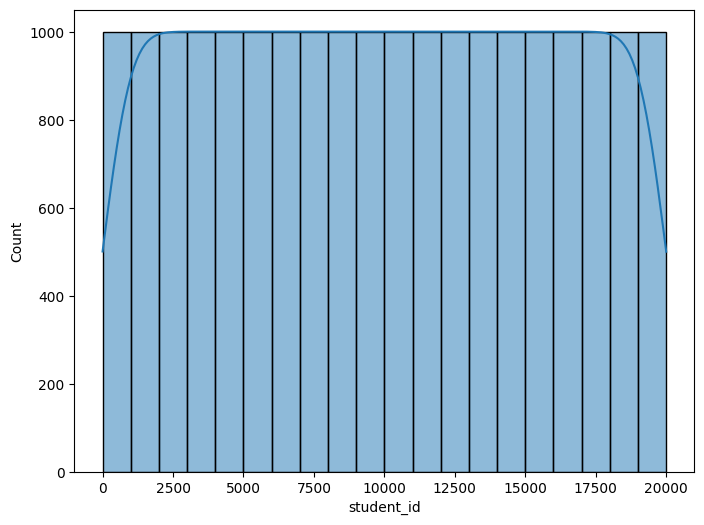

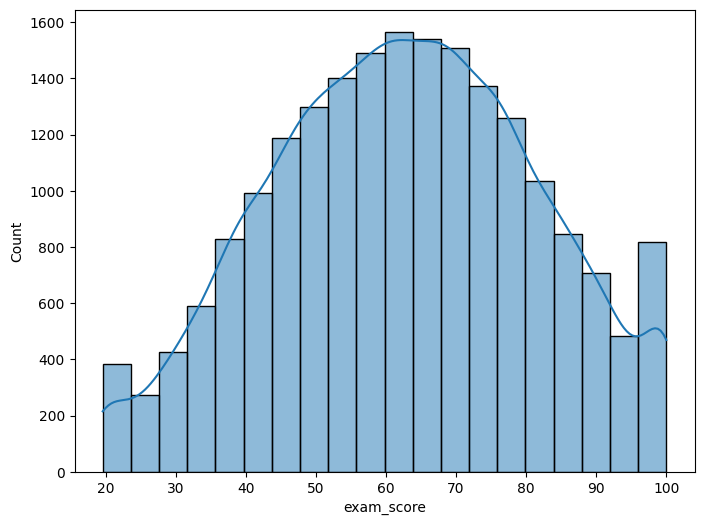

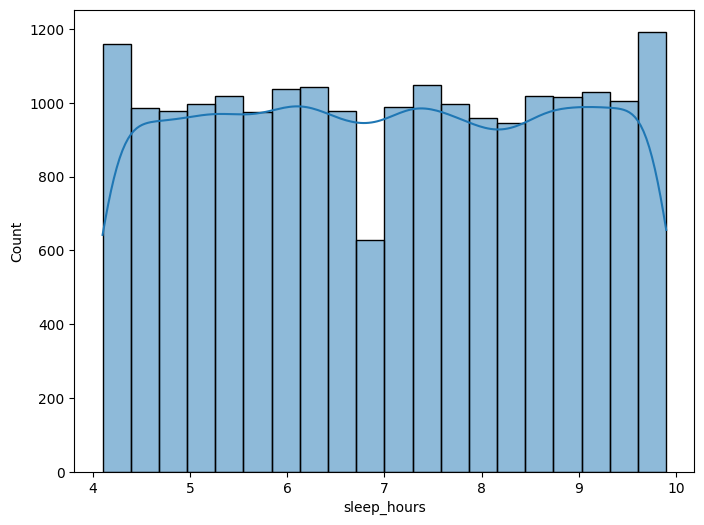

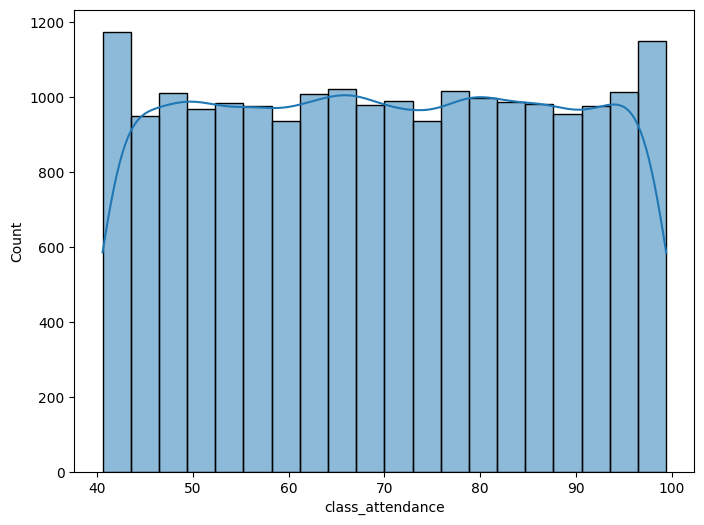

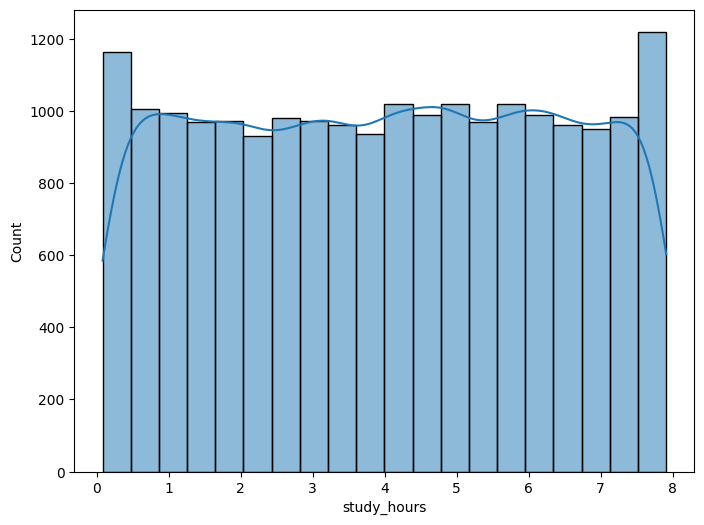

<Figure size 800x600 with 0 Axes>

In [18]:
numeric_columns=['age','student_id','exam_score','sleep_hours','class_attendance','study_hours']
for col in numeric_columns:
  sns.histplot(df[col],kde=True,bins=20)
  plt.figure(figsize=(8,6))

<Axes: xlabel='gender', ylabel='count'>

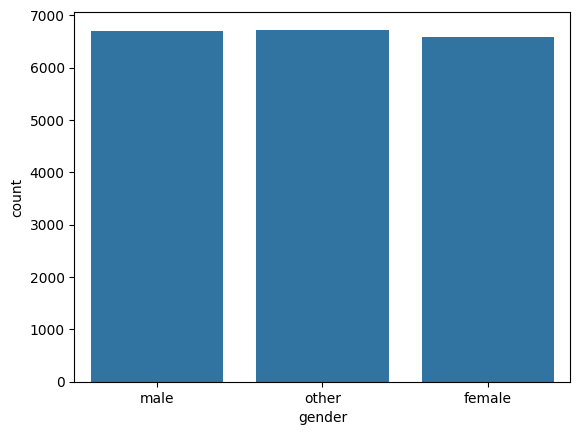

In [23]:
sns.countplot(x=df['gender'])

<Axes: xlabel='course', ylabel='count'>

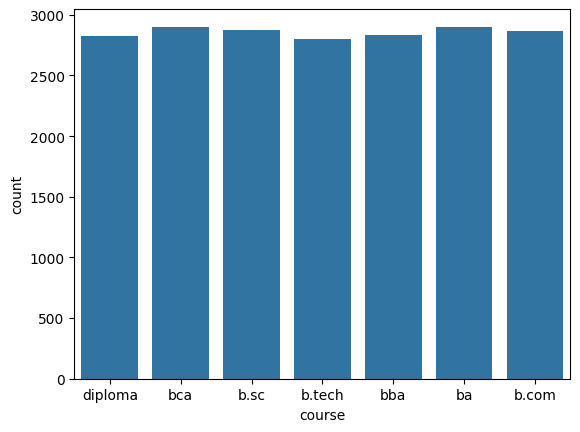

In [22]:
sns.countplot(x=df['course'])

<Axes: xlabel='sleep_quality', ylabel='count'>

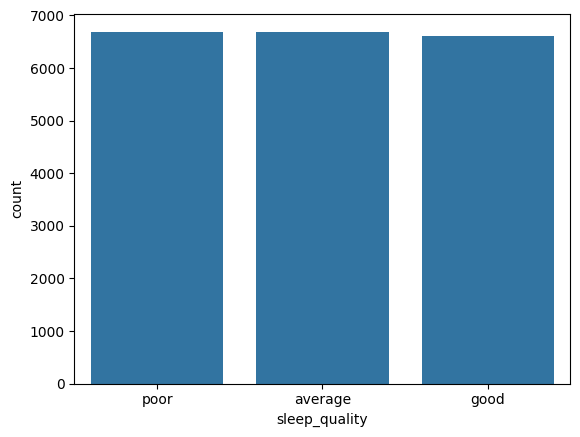

In [24]:
sns.countplot(x=df['sleep_quality'])

<Axes: xlabel='study_method', ylabel='count'>

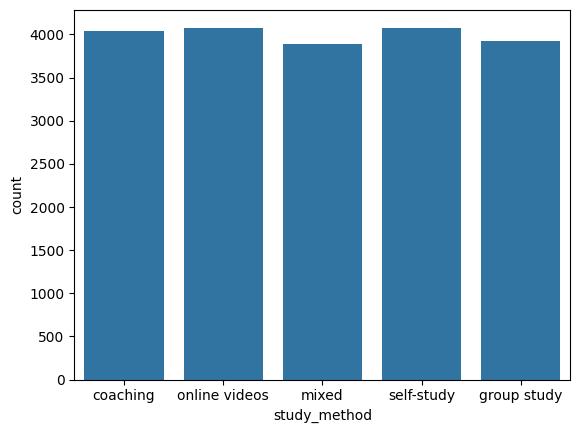

In [25]:
sns.countplot(x=df['study_method'])

<Axes: xlabel='internet_access', ylabel='count'>

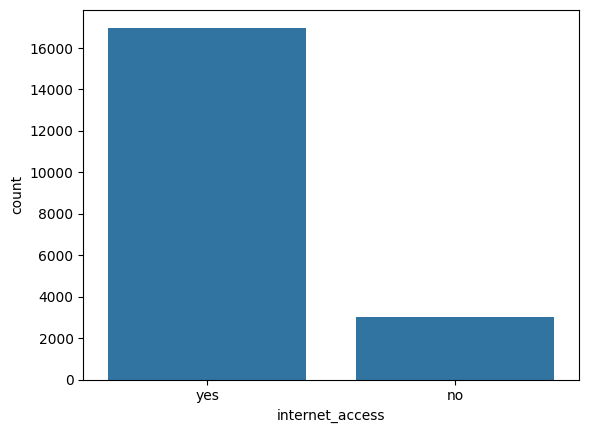

In [26]:
sns.countplot(x=df['internet_access'])

<Axes: xlabel='facility_rating', ylabel='count'>

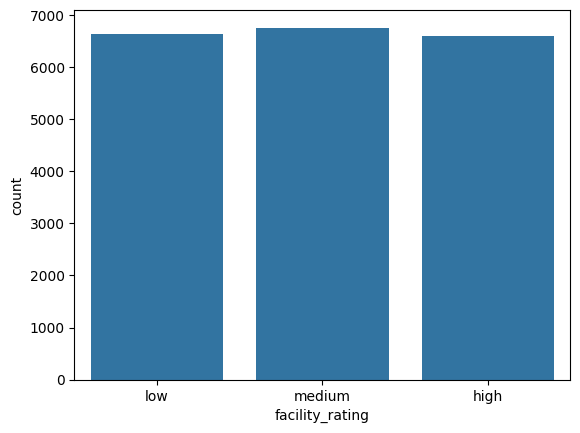

In [27]:
sns.countplot(x=df['facility_rating'])

<Axes: xlabel='exam_difficulty', ylabel='count'>

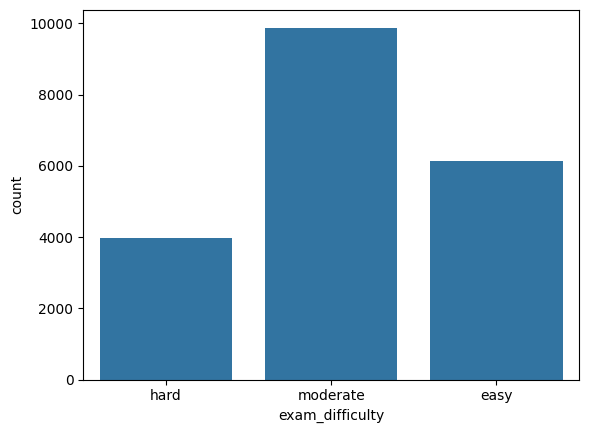

In [28]:
sns.countplot(x=df['exam_difficulty'])

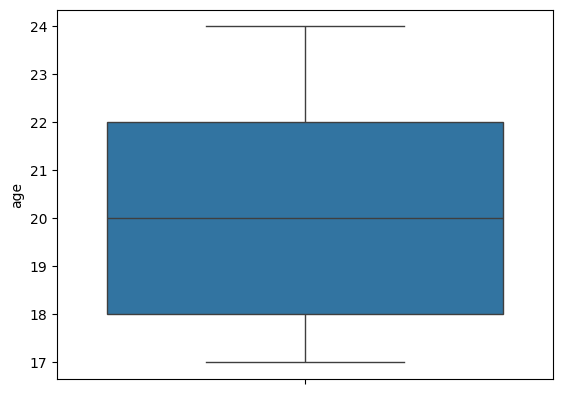

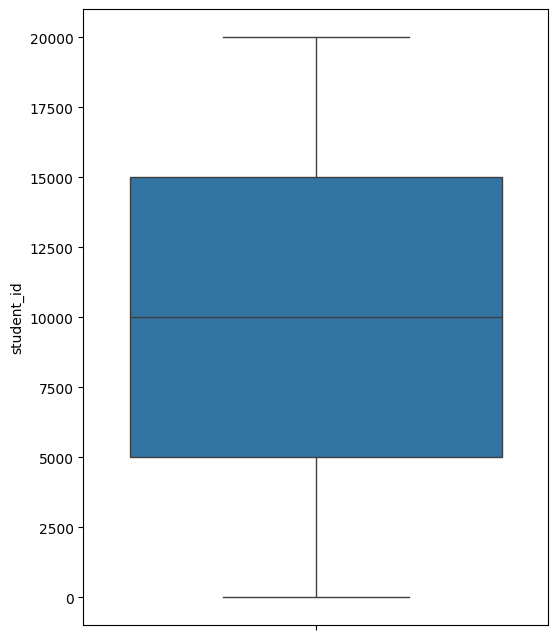

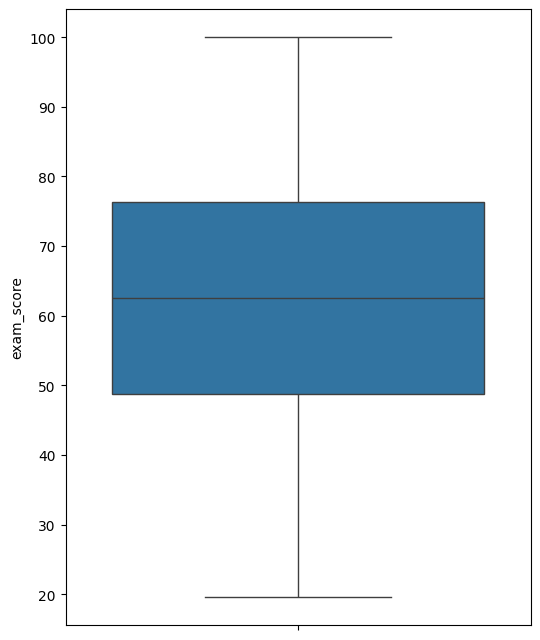

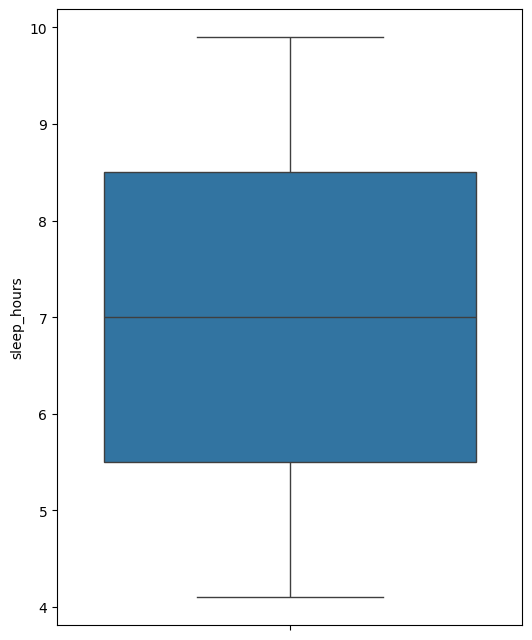

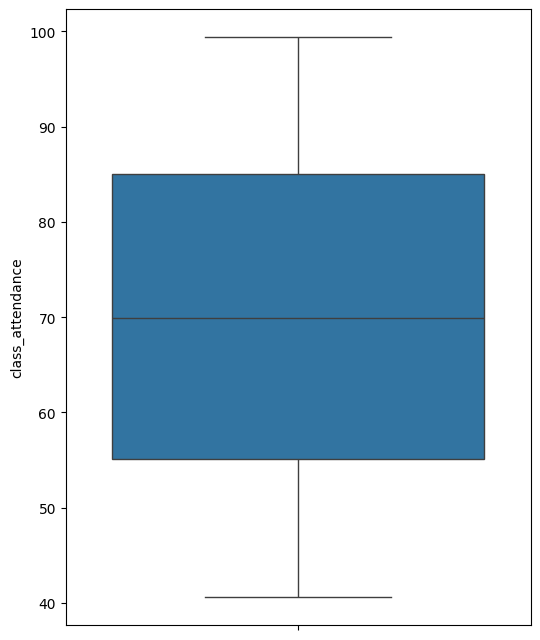

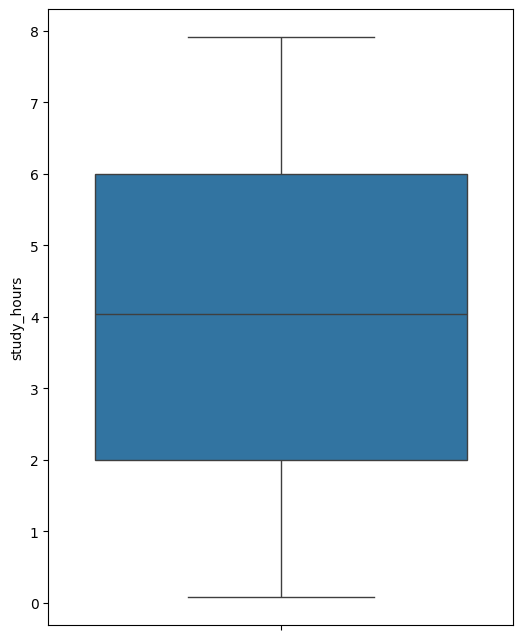

<Figure size 600x800 with 0 Axes>

In [29]:
for col in numeric_columns:
  sns.boxplot(df[col])
  plt.figure(figsize=(6,8))


In [30]:
df_cleaned=df.copy()

In [31]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [32]:
df_cleaned.drop_duplicates(inplace=True)

In [33]:
df_cleaned.shape

(20000, 13)

In [34]:
df_cleaned.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [35]:
df_cleaned.dtypes

,0
student_id,int64
age,int64
gender,object
course,object
study_hours,float64
class_attendance,float64
internet_access,object
sleep_hours,float64
sleep_quality,object
study_method,object


In [36]:
df_cleaned['gender'].value_counts()

,count
gender,
other,6726
male,6695
female,6579


In [37]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [38]:
df_cleaned['course'].value_counts()

,count
course,
bca,2902
ba,2896
b.sc,2878
b.com,2864
bba,2836
diploma,2826
b.tech,2798


In [42]:
df_cleaned['course']=df_cleaned['course'].map({'low':0,'medium':1,'high':2})

In [43]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,NaN,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,NaN,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,NaN,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,NaN,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,NaN,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [44]:
df_cleaned['internet_access'].value_counts()

,count
internet_access,
yes,16988
no,3012


In [47]:
df_cleaned['internet_access']=df_cleaned['internet_access'].map({'low':0,'medium':1,'high':2})

In [48]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,NaN,2.78,92.9,NaN,7.4,poor,coaching,low,hard,58.9
1,2,23,other,NaN,3.37,64.8,NaN,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,NaN,7.88,76.8,NaN,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,NaN,0.67,48.4,NaN,5.8,average,online videos,low,moderate,29.7
4,5,20,female,NaN,0.89,71.6,NaN,9.8,poor,coaching,low,moderate,43.7


In [45]:
df_cleaned['sleep_quality'].value_counts()

,count
sleep_quality,
average,6694
poor,6687
good,6619


In [49]:
df_cleaned['sleep_quality']=df_cleaned['sleep_quality'].map({'low':0,'medium':1,'high':2})

In [50]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,NaN,2.78,92.9,NaN,7.4,NaN,coaching,low,hard,58.9
1,2,23,other,NaN,3.37,64.8,NaN,4.6,NaN,online videos,medium,moderate,54.8
2,3,22,male,NaN,7.88,76.8,NaN,8.5,NaN,coaching,high,moderate,90.3
3,4,20,other,NaN,0.67,48.4,NaN,5.8,NaN,online videos,low,moderate,29.7
4,5,20,female,NaN,0.89,71.6,NaN,9.8,NaN,coaching,low,moderate,43.7


In [46]:
df_cleaned['study_method'].value_counts()

,count
study_method,
self-study,4079
online videos,4069
coaching,4036
group study,3922
mixed,3894


In [51]:
df_cleaned['study_method']=df_cleaned['study_method'].map({'low':0,'medium':1,'high':2})

In [52]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,NaN,2.78,92.9,NaN,7.4,NaN,NaN,low,hard,58.9
1,2,23,other,NaN,3.37,64.8,NaN,4.6,NaN,NaN,medium,moderate,54.8
2,3,22,male,NaN,7.88,76.8,NaN,8.5,NaN,NaN,high,moderate,90.3
3,4,20,other,NaN,0.67,48.4,NaN,5.8,NaN,NaN,low,moderate,29.7
4,5,20,female,NaN,0.89,71.6,NaN,9.8,NaN,NaN,low,moderate,43.7


In [53]:
df_cleaned['facility_rating'].value_counts()

,count
facility_rating,
medium,6760
low,6638
high,6602


In [55]:
df_cleaned['facility_rating']=df_cleaned['facility_rating'].map({'low':0,'medium':1,'high':2})

In [57]:

df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,NaN,2.78,92.9,NaN,7.4,NaN,NaN,0,NaN,58.9
1,2,23,other,NaN,3.37,64.8,NaN,4.6,NaN,NaN,1,NaN,54.8
2,3,22,male,NaN,7.88,76.8,NaN,8.5,NaN,NaN,2,NaN,90.3
3,4,20,other,NaN,0.67,48.4,NaN,5.8,NaN,NaN,0,NaN,29.7
4,5,20,female,NaN,0.89,71.6,NaN,9.8,NaN,NaN,0,NaN,43.7


In [54]:
df_cleaned['exam_difficulty'].value_counts()


,count
exam_difficulty,
moderate,9878
easy,6141
hard,3981


In [56]:
df_cleaned['exam_difficulty']=df_cleaned['exam_difficulty'].map({'low':0,'medium':1,'high':2})

In [58]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,NaN,2.78,92.9,NaN,7.4,NaN,NaN,0,NaN,58.9
1,2,23,other,NaN,3.37,64.8,NaN,4.6,NaN,NaN,1,NaN,54.8
2,3,22,male,NaN,7.88,76.8,NaN,8.5,NaN,NaN,2,NaN,90.3
3,4,20,other,NaN,0.67,48.4,NaN,5.8,NaN,NaN,0,NaN,29.7
4,5,20,female,NaN,0.89,71.6,NaN,9.8,NaN,NaN,0,NaN,43.7


In [59]:
df_cleaned.rename(columns={'exam_score':'exam_score_out_of_100'},inplace=True)

In [60]:
df_cleaned.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score_out_of_100
0,1,17,male,NaN,2.78,92.9,NaN,7.4,NaN,NaN,0,NaN,58.9
1,2,23,other,NaN,3.37,64.8,NaN,4.6,NaN,NaN,1,NaN,54.8
2,3,22,male,NaN,7.88,76.8,NaN,8.5,NaN,NaN,2,NaN,90.3
3,4,20,other,NaN,0.67,48.4,NaN,5.8,NaN,NaN,0,NaN,29.7
4,5,20,female,NaN,0.89,71.6,NaN,9.8,NaN,NaN,0,NaN,43.7
